#### Spark Session: It includes both SparkContext and SQLContext

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession\
        .builder\
        .appName('LondonCrime')\
        .getOrCreate()

#### Read data from the external file, here we read from csv

In [3]:
data = spark.read\
            .format('csv')\
            .option("header","true")\
            .load('../london_crime_by_lsoa.csv')

In [4]:
data.printSchema()

root
 |-- lsoa_code: string (nullable = true)
 |-- borough: string (nullable = true)
 |-- major_category: string (nullable = true)
 |-- minor_category: string (nullable = true)
 |-- value: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)



In [7]:
data.show()

+---------+--------------------+--------------------+--------------------+-----+----+-----+
|lsoa_code|             borough|      major_category|      minor_category|value|year|month|
+---------+--------------------+--------------------+--------------------+-----+----+-----+
|E01001116|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|          Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|E01001320|              Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|E01001342|              Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|E01002633|            Hounslow|             Robbery|   Personal Property|    0|

In [8]:
#total number of crime recorded
data.count()

13490604

In [9]:
#show the first 5 rows of the data
data.limit(5).show()

+---------+----------+--------------------+--------------------+-----+----+-----+
|lsoa_code|   borough|      major_category|      minor_category|value|year|month|
+---------+----------+--------------------+--------------------+-----+----+-----+
|E01001116|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|E01001646| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|E01000677|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|E01003774| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|E01004563|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+---------+----------+--------------------+--------------------+-----+----+-----+



#### Cleaning Data
* Drop rows which do not have valid values
* Drop columns which we do not use in our analysis 

In [11]:
#drop the lsoa_code column
data = data.drop('lsoa_code')
data.limit(5).show()

+----------+--------------------+--------------------+-----+----+-----+
|   borough|      major_category|      minor_category|value|year|month|
+----------+--------------------+--------------------+-----+----+-----+
|   Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
| Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|   Bromley|Violence Against ...|      Other violence|    0|2015|    5|
| Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
+----------+--------------------+--------------------+-----+----+-----+



In [13]:
#drop rows with na
data = data.dropna()
data.count()

13490604

####  Total Boroughs included in the report

In [19]:
total_borough = data.select(data['borough'])\
                    .distinct()
total_borough.count()

33

In [20]:
total_borough.show()

+--------------------+
|             borough|
+--------------------+
|             Croydon|
|          Wandsworth|
|              Bexley|
|             Lambeth|
|Barking and Dagenham|
|              Camden|
|           Greenwich|
|              Newham|
|       Tower Hamlets|
|            Hounslow|
|              Barnet|
|              Harrow|
|Kensington and Ch...|
|           Islington|
|               Brent|
|            Haringey|
|             Bromley|
|              Merton|
|         Westminster|
|             Hackney|
+--------------------+
only showing top 20 rows



#### Display the details of Crime where borough is Hackney

In [24]:
hackney_data = data.filter(data['borough']=='Hackney')
hackney_data.show()

+-------+--------------------+--------------------+-----+----+-----+
|borough|      major_category|      minor_category|value|year|month|
+-------+--------------------+--------------------+-----+----+-----+
|Hackney|     Criminal Damage|Criminal Damage T...|    0|2011|    6|
|Hackney|Violence Against ...|          Harassment|    1|2013|    2|
|Hackney|     Criminal Damage|Other Criminal Da...|    0|2011|    7|
|Hackney|Violence Against ...|        Wounding/GBH|    0|2013|   12|
|Hackney|  Theft and Handling|  Other Theft Person|    0|2016|    8|
|Hackney|            Burglary|Burglary in a Dwe...|    2|2008|    5|
|Hackney|             Robbery|   Business Property|    0|2016|    7|
|Hackney|  Theft and Handling|Theft/Taking of P...|    0|2009|   12|
|Hackney|               Drugs|    Drug Trafficking|    0|2014|    4|
|Hackney|  Theft and Handling|Handling Stolen G...|    0|2014|    6|
|Hackney|            Burglary|Burglary in Other...|    0|2008|   12|
|Hackney|Violence Against ...| Ass

#### Display the crime which happened between 2015 and 2016

In [27]:
data_2015_2016 = data.filter(data['year'].isin('2016','2015'))
data_2015_2016.show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|              Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
|             Lambeth|Violence Against ...|      Other violence|    0|2015|    4|
|          Hillingdon|  Theft and Handling|Theft/Taking Of M...|    0|2016|    2|
|Kingston upon Thames|  Theft and Handling|    Theft From Shops|    0|2016|   11|
|            Haringey|Violence Against ...|        Wounding/GBH|    0|2015|   12|
|            Lew

#### Display a sample (10 percent ) of the above output

In [28]:
data_2015_2016.sample(fraction=0.1).show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|Kingston upon Thames|  Theft and Handling|Motor Vehicle Int...|    0|2016|    5|
|             Lambeth|               Drugs|    Drug Trafficking|    0|2015|    9|
|         Westminster|     Criminal Damage|Criminal Damage T...|    0|2015|   12|
|              Newham|Violence Against ...|          Harassment|    0|2015|    8|
|              Bexley|Violence Against ...| Assault with Injury|    0|2015|    6|
|              Ealing|Violence Against ...|      Common Assault|    1|2015|   12|
|              Harrow|               Drugs| Possession Of Drugs|    0|2016|   11|
|             Enfield|     Criminal Damage|Other Criminal Da...|    0|2015|    9|
|           Islington|    Fraud or Forgery|  Counted per Victim|    0|2015|    3|
|Kingston upon T

#### Display the crime from 2014 onwards

In [34]:
data_2014_onwards = data.filter(data['year']>='2014')
data_2014_onwards.show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|              Sutton|  Theft and Handling|Theft/Taking of P...|    1|2016|    8|
|             Lambeth|Violence Against ...|      Other violence|    0|2015|    4|
|Richmond upon Thames|             Robbery|   Personal Property|    0|2014|    1|
|          Hillingdon|  Theft and Handling|Theft/Taking Of M...|    0|2016|    2|
|Kingston upon Thames|  Theft and Handling|    Theft From Shops|    0|2016|   11|
|            Har

#### Total crime per borough

In [42]:
borough_crime_count = data.groupBy('borough')\
                            .count()
borough_crime_count.show()

+--------------------+------+
|             borough| count|
+--------------------+------+
|             Croydon|602100|
|          Wandsworth|498636|
|              Bexley|385668|
|             Lambeth|519048|
|Barking and Dagenham|311040|
|              Camden|378432|
|           Greenwich|421200|
|              Newham|471420|
|       Tower Hamlets|412128|
|            Hounslow|395928|
|              Barnet|572832|
|              Harrow|365688|
|Kensington and Ch...|296784|
|           Islington|359208|
|               Brent|490644|
|            Haringey|413856|
|             Bromley|523908|
|              Merton|339876|
|         Westminster|366660|
|             Hackney|417744|
+--------------------+------+
only showing top 20 rows



#### Total convictions per borough

In [51]:
borough_conviction_sum = data.groupBy('borough')\
                             .agg({"value":"sum"})
borough_conviction_sum.show()

+--------------------+----------+
|             borough|sum(value)|
+--------------------+----------+
|             Croydon|  260294.0|
|          Wandsworth|  204741.0|
|              Bexley|  114136.0|
|             Lambeth|  292178.0|
|Barking and Dagenham|  149447.0|
|              Camden|  275147.0|
|           Greenwich|  181568.0|
|              Newham|  262024.0|
|       Tower Hamlets|  228613.0|
|            Hounslow|  186772.0|
|              Barnet|  212191.0|
|              Harrow|  116848.0|
|Kensington and Ch...|  171981.0|
|           Islington|  230286.0|
|               Brent|  227551.0|
|            Haringey|  213272.0|
|             Bromley|  184349.0|
|              Merton|  115654.0|
|         Westminster|  455028.0|
|             Hackney|  217119.0|
+--------------------+----------+
only showing top 20 rows



In [53]:
#renaming the aboove sum(value) col
borough_conviction_sum = data.groupBy('borough')\
                             .agg({"value":"sum"})\
                             .withColumnRenamed("sum(value)","convictions")
borough_conviction_sum.show()

+--------------------+-----------+
|             borough|convictions|
+--------------------+-----------+
|             Croydon|   260294.0|
|          Wandsworth|   204741.0|
|              Bexley|   114136.0|
|             Lambeth|   292178.0|
|Barking and Dagenham|   149447.0|
|              Camden|   275147.0|
|           Greenwich|   181568.0|
|              Newham|   262024.0|
|       Tower Hamlets|   228613.0|
|            Hounslow|   186772.0|
|              Barnet|   212191.0|
|              Harrow|   116848.0|
|Kensington and Ch...|   171981.0|
|           Islington|   230286.0|
|               Brent|   227551.0|
|            Haringey|   213272.0|
|             Bromley|   184349.0|
|              Merton|   115654.0|
|         Westminster|   455028.0|
|             Hackney|   217119.0|
+--------------------+-----------+
only showing top 20 rows



#### Per-borough convictions expressed in percentage
Total convictions

In [55]:
total_borough_convictions = borough_conviction_sum.agg({"convictions":"sum"})

total_borough_convictions.show()

+----------------+
|sum(convictions)|
+----------------+
|       6447758.0|
+----------------+



#### Extracting total convictions into a variable

In [56]:
total_convictions = total_borough_convictions.collect()[0][0]
total_convictions

6447758.0

#### Add new column which contains the % convictions for each borough

In [58]:
import pyspark.sql.functions as func

borough_percentage_contribution = borough_conviction_sum.withColumn(
    "%contribution",
    func.round(borough_conviction_sum.convictions / total_convictions * 100, 2))

borough_percentage_contribution.printSchema()

root
 |-- borough: string (nullable = true)
 |-- convictions: double (nullable = true)
 |-- %contribution: double (nullable = true)



#### Order borough_percentage_contribution in desc order

In [61]:
borough_percentage_contribution.orderBy(borough_percentage_contribution['%contribution'].desc()).show()

+--------------------+-----------+-------------+
|             borough|convictions|%contribution|
+--------------------+-----------+-------------+
|         Westminster|   455028.0|         7.06|
|             Lambeth|   292178.0|         4.53|
|           Southwark|   278809.0|         4.32|
|              Camden|   275147.0|         4.27|
|              Newham|   262024.0|         4.06|
|             Croydon|   260294.0|         4.04|
|              Ealing|   251562.0|          3.9|
|           Islington|   230286.0|         3.57|
|       Tower Hamlets|   228613.0|         3.55|
|               Brent|   227551.0|         3.53|
|             Hackney|   217119.0|         3.37|
|            Lewisham|   215137.0|         3.34|
|            Haringey|   213272.0|         3.31|
|              Barnet|   212191.0|         3.29|
|          Hillingdon|   209680.0|         3.25|
|          Wandsworth|   204741.0|         3.18|
|      Waltham Forest|   203879.0|         3.16|
|             Enfiel

#### Convictions across months in a particular year (2014)

In [62]:
data.show()

+--------------------+--------------------+--------------------+-----+----+-----+
|             borough|      major_category|      minor_category|value|year|month|
+--------------------+--------------------+--------------------+-----+----+-----+
|             Croydon|            Burglary|Burglary in Other...|    0|2016|   11|
|           Greenwich|Violence Against ...|      Other violence|    0|2016|   11|
|             Bromley|Violence Against ...|      Other violence|    0|2015|    5|
|           Redbridge|            Burglary|Burglary in Other...|    0|2016|    3|
|          Wandsworth|             Robbery|   Personal Property|    0|2008|    6|
|              Ealing|  Theft and Handling|         Other Theft|    0|2012|    5|
|              Ealing|Violence Against ...|    Offensive Weapon|    0|2010|    7|
|            Hounslow|             Robbery|   Personal Property|    0|2013|    4|
|              Newham|     Criminal Damage|Criminal Damage T...|    0|2013|    9|
|              S

In [68]:
conviction_monthly = data.filter(data['year']=='2014')\
                            .groupBy(data['month'])\
                            .agg({"value":"sum"})\
                            .withColumnRenamed("sum(value)","convictions")
conviction_monthly.show()

+-----+-----------+
|month|convictions|
+-----+-----------+
|    7|    58564.0|
|   11|    59704.0|
|    3|    57669.0|
|    8|    55641.0|
|    5|    56327.0|
|    6|    57039.0|
|    9|    56933.0|
|    1|    55515.0|
|   10|    60537.0|
|    4|    53467.0|
|   12|    57565.0|
|    2|    51222.0|
+-----+-----------+



In [69]:
total_conviction_monthly = conviction_monthly.agg({"convictions":"sum"})\
                                             .collect()[0][0]

total_conviction_monthly = conviction_monthly\
    .withColumn("percent",
                func.round(conviction_monthly.convictions/total_conviction_monthly * 100, 2))
total_conviction_monthly.columns

['month', 'convictions', 'percent']

In [70]:
total_conviction_monthly.orderBy(total_conviction_monthly.percent.desc()).show()

+-----+-----------+-------+
|month|convictions|percent|
+-----+-----------+-------+
|   10|    60537.0|    8.9|
|   11|    59704.0|   8.78|
|    7|    58564.0|   8.61|
|    3|    57669.0|   8.48|
|   12|    57565.0|   8.46|
|    6|    57039.0|   8.39|
|    9|    56933.0|   8.37|
|    5|    56327.0|   8.28|
|    8|    55641.0|   8.18|
|    1|    55515.0|   8.16|
|    4|    53467.0|   7.86|
|    2|    51222.0|   7.53|
+-----+-----------+-------+



#### Most prevalant crimes

In [71]:
crimes_category = data.groupBy('major_category')\
                      .agg({"value":"sum"})\
                      .withColumnRenamed("sum(value)","convictions")

In [72]:
crimes_category.orderBy(crimes_category.convictions.desc()).show()

+--------------------+-----------+
|      major_category|convictions|
+--------------------+-----------+
|  Theft and Handling|  2661861.0|
|Violence Against ...|  1558081.0|
|            Burglary|   754293.0|
|     Criminal Damage|   630938.0|
|               Drugs|   470765.0|
|             Robbery|   258873.0|
|Other Notifiable ...|   106349.0|
|    Fraud or Forgery|     5325.0|
|     Sexual Offences|     1273.0|
+--------------------+-----------+



In [73]:
year_df = data.select('year')

In [74]:
year_df.agg({'year':'max'}).show()

+---------+
|max(year)|
+---------+
|     2016|
+---------+



In [75]:
data.crosstab('borough', 'major_category')\
    .select('borough_major_category', 'Burglary', 'Drugs', 'Fraud or Forgery', 'Robbery')\
    .show()

+----------------------+--------+-----+----------------+-------+
|borough_major_category|Burglary|Drugs|Fraud or Forgery|Robbery|
+----------------------+--------+-----+----------------+-------+
|              Havering|   32400|32616|            5508|  27648|
|                Merton|   26784|29160|            5724|  23652|
|              Haringey|   31320|35424|           10368|  29484|
|         Tower Hamlets|   31104|37368|            5400|  28512|
|               Bromley|   42552|42336|            8532|  34668|
|               Enfield|   39528|44064|            9720|  35532|
|  Kingston upon Thames|   21168|22140|            3780|  15660|
|           Westminster|   27648|32616|            8748|  25056|
|  Richmond upon Thames|   24840|23004|            2808|  18468|
|              Lewisham|   36504|43740|           11016|  34884|
|                 Brent|   37368|46980|            9288|  34128|
|  Barking and Dagenham|   23760|26244|            7236|  22248|
|             Redbridge| 

#### Visualizing the data

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#### Distribution of crime across boroughs in a particular year

In [77]:
def describe_year(year):
    yearly_details = data.filter(data.year == year)\
                         .groupBy('borough')\
                         .agg({'value':'sum'})\
                         .withColumnRenamed("sum(value)","convictions")
    
    borough_list = [x[0] for x in yearly_details.toLocalIterator()]
    convictions_list = [x[1] for x in yearly_details.toLocalIterator()]
  
    plt.figure(figsize=(33, 10)) 
    plt.bar(borough_list, convictions_list)
    
    plt.title('Crime for the year: ' + year, fontsize=30)
    plt.xlabel('Boroughs',fontsize=30)
    plt.ylabel('Convictions', fontsize=30)

    plt.xticks(rotation=90, fontsize=30)
    plt.yticks(fontsize=30)
    plt.autoscale()
    plt.show()

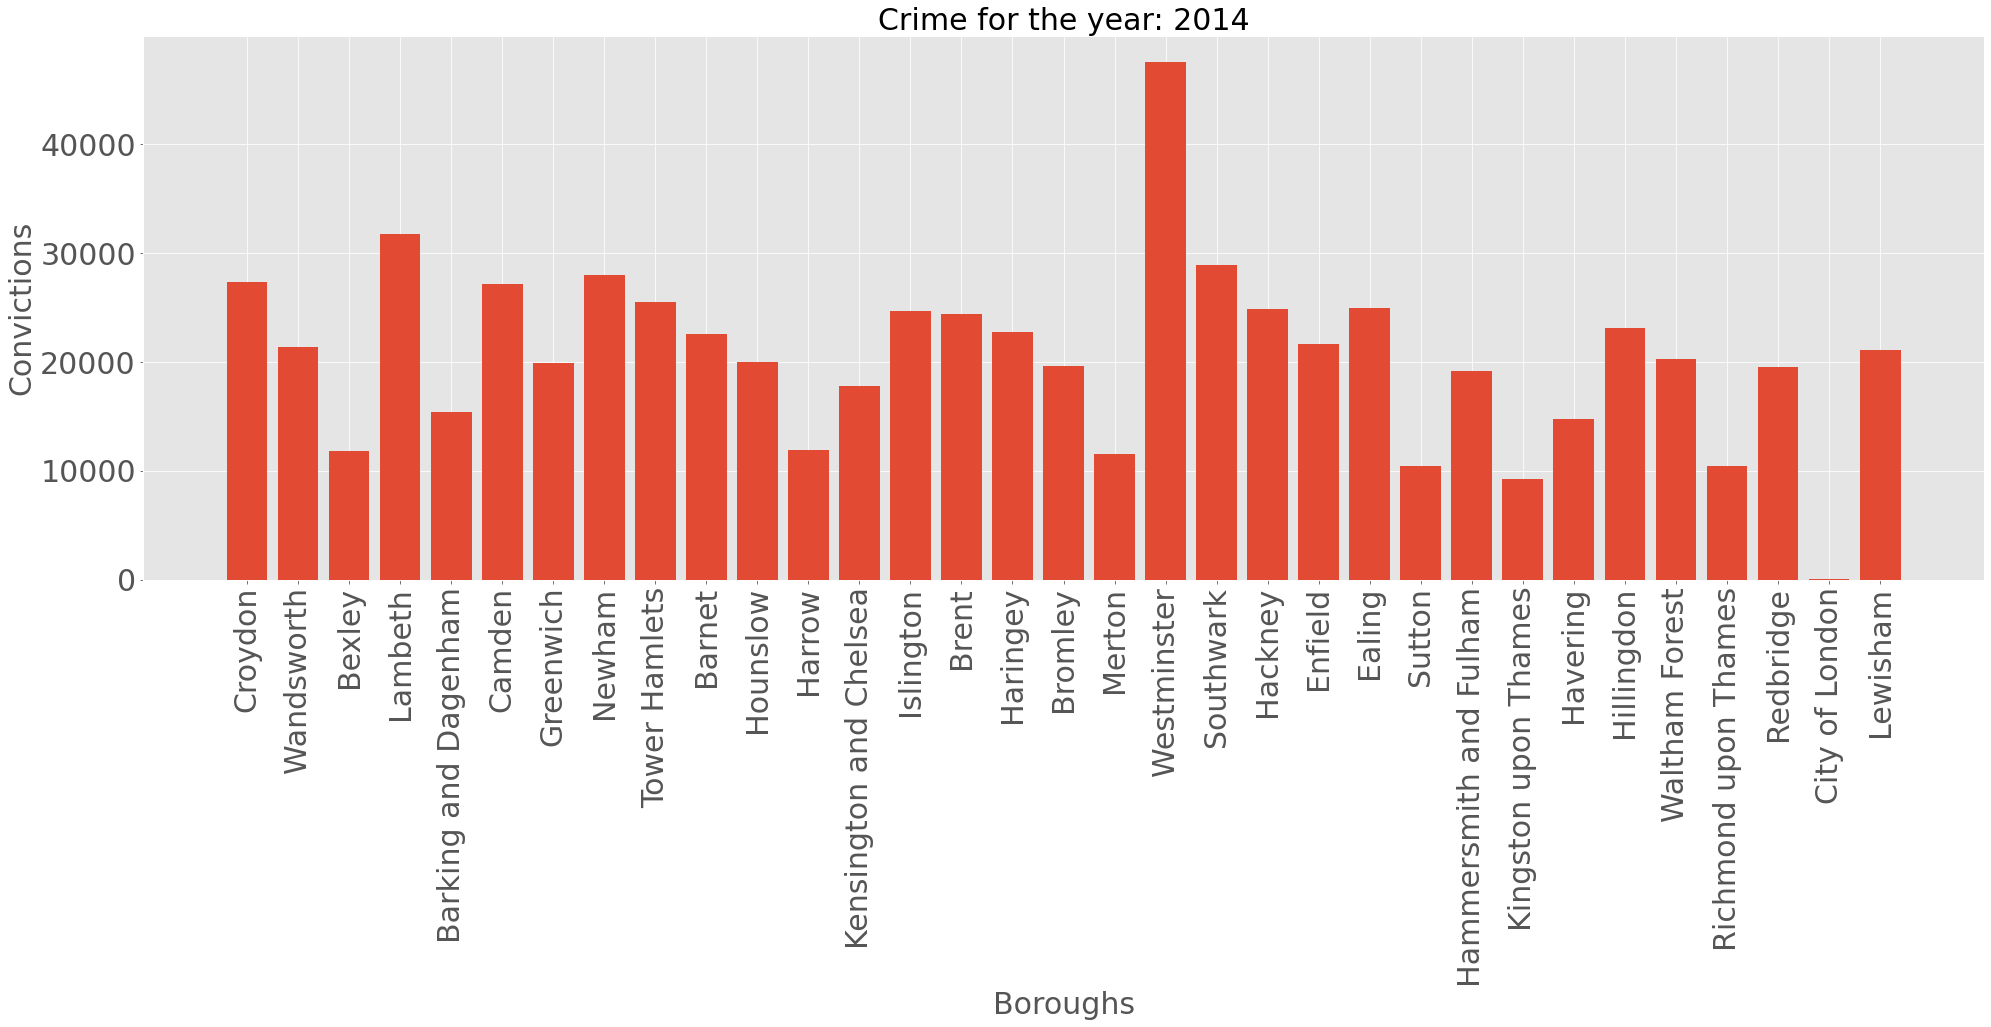

In [78]:
describe_year('2014')